In [1]:
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import json
import geopandas as gpd

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:91: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
# 한글깨짐방지코드
import matplotlib
from matplotlib import font_manager, rc

font_name=font_manager.FontProperties(fname="malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [3]:
file_path= 'data/'

In [4]:
사업체매출정보 = pd.read_csv(file_path+ '17.세종시_사업체_매출정보.csv')
연령인구 = pd.read_csv(file_path+'22.세종시_연령별_인구현황.csv')
인구거주격자 = gpd.read_file(file_path+'19.세종시_연령별_거주인구정보_격자.geojson')
사업체매출격자 = gpd.read_file(file_path+'16.세종시_사업체_매출정보.geojson')

In [5]:
사업체매출정보.head()

,gid,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,runoutmon,smbiz_yn,...,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn
0,다바667567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,다바667568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,다바668566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,다바668567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,다바668568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
연령인구.head()

,읍면동,201701_남자(총_거주자_수),201701_남자(연령구간인구수),201701_남자(0~9세),201701_남자(10~19세),201701_남자(20~29세),201701_남자(30~39세),201701_남자(40~49세),201701_남자(50~59세),201701_남자(60~69세),...,202012_여자(10~19세),202012_여자(20~29세),202012_여자(30~39세),202012_여자(40~49세),202012_여자(50~59세),202012_여자(60~69세),202012_여자(70~79세),202012_여자(80~89세),202012_여자(90~99세),202012_여자(100세_이상)
0,세종특별자치시,121937,121937,17864,13917,13463,22372,23665,15288,8922,...,21252,18385,31411,33519,21592,15113,7736,4672,915,22
1,조치원읍,23529,23529,2525,2473,3461,3783,4126,3393,2131,...,2050,2811,2436,3186,3110,2676,1725,930,162,7
2,연기면,1463,1463,56,93,220,176,263,296,203,...,54,156,104,109,210,221,138,102,23,1
3,연동면,1828,1828,87,123,210,228,247,368,318,...,63,112,116,123,245,307,224,212,45,0
4,부강면,3554,3554,235,287,472,505,588,650,396,...,170,255,274,314,457,511,353,251,32,1


In [10]:
인구거주격자.head()

,gid,201710_20대_거주인구수,201810_20대_거주인구수,201910_20대_거주인구수,202010_20대_거주인구수,201710_30대_거주인구수,201810_30대_거주인구수,201910_30대_거주인구수,202010_30대_거주인구수,201710_40대_거주인구수,...,202010_80대_거주인구수,201710_90대_거주인구수,201810_90대_거주인구수,201910_90대_거주인구수,202010_90대_거주인구수,201710_100세이상_거주인구수,201810_100세이상_거주인구수,201910_100세이상_거주인구수,202010_100세이상_거주인구수,geometry
0,다바667567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((127.12716 36.70773, 127.12716 ..."
1,다바667568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((127.12716 36.70863, 127.12716 ..."
2,다바668566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((127.12829 36.70683, 127.12828 ..."
3,다바668567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((127.12828 36.70773, 127.12828 ..."
4,다바668568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((127.12828 36.70863, 127.12828 ..."


In [12]:
사업체매출정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47396 entries, 0 to 47395
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gid                     47396 non-null  object 
 1   ws_cnt                  312 non-null    float64
 2   found_age_1             312 non-null    float64
 3   found_age_2             312 non-null    float64
 4   found_age_3             312 non-null    float64
 5   found_age_4             312 non-null    float64
 6   found_age_5             312 non-null    float64
 7   found_age_6             312 non-null    float64
 8   runoutmon               312 non-null    float64
 9   smbiz_yn                312 non-null    float64
 10  rpr_per_gender_m        312 non-null    float64
 11  rpr_per_gender_f        312 non-null    float64
 12  rpr_per_age_bin_10      312 non-null    float64
 13  rpr_per_age_bin_20      312 non-null    float64
 14  rpr_per_age_bin_30      312 non-null  

In [21]:
인구거주격자.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 47396 entries, 0 to 47395
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gid                  47396 non-null  object  
 1   201710_20대_거주인구수     2925 non-null   float64 
 2   201810_20대_거주인구수     3020 non-null   float64 
 3   201910_20대_거주인구수     3055 non-null   float64 
 4   202010_20대_거주인구수     3062 non-null   float64 
 5   201710_30대_거주인구수     2969 non-null   float64 
 6   201810_30대_거주인구수     2986 non-null   float64 
 7   201910_30대_거주인구수     3038 non-null   float64 
 8   202010_30대_거주인구수     3014 non-null   float64 
 9   201710_40대_거주인구수     3138 non-null   float64 
 10  201810_40대_거주인구수     3271 non-null   float64 
 11  201910_40대_거주인구수     3316 non-null   float64 
 12  202010_40대_거주인구수     3324 non-null   float64 
 13  201710_50대_거주인구수     4089 non-null   float64 
 14  201810_50대_거주인구수     4253 non-null   float64 
 15  201910_50대_

In [5]:
사업체매출정보.dropna(inplace=True)
사업체매출정보.reset_index(inplace=True)
사업체매출정보.drop(['index'],axis=1,inplace=True)

In [6]:
사업체매출정보.head()

,gid,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,runoutmon,smbiz_yn,...,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn
0,다바693579,12.0,0.0,1.0,0.0,0.0,2.0,9.0,0.0,9.0,...,N,N,N,N,N,Y,Y,Y,N,N
1,다바694581,7.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,7.0,...,N,N,N,N,Y,N,N,Y,N,N
2,다바734535,9.0,0.0,0.0,1.0,0.0,2.0,6.0,0.0,9.0,...,N,Y,N,N,Y,N,Y,Y,N,N
3,다바735333,6.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,4.0,...,N,N,N,N,N,Y,N,N,N,N
4,다바735534,9.0,0.0,0.0,1.0,0.0,1.0,7.0,0.0,8.0,...,N,N,N,N,N,Y,N,N,N,N


In [6]:
사업체매출grid = gpd.read_file(file_path+'16.세종시_사업체_매출정보.geojson')
사업체매출grid.dropna(inplace=True)
사업체매출grid.reset_index(inplace=True)
사업체매출grid.drop(['index'],axis=1,inplace=True)

In [8]:
사업체매출grid.head()

,gid,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,runoutmon,smbiz_yn,...,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn,geometry
0,다바693579,12.0,0.0,1.0,0.0,0.0,2.0,9.0,0.0,9.0,...,N,N,N,N,Y,Y,Y,N,N,"MULTIPOLYGON (((127.15623 36.71863, 127.15622 ..."
1,다바694581,7.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,7.0,...,N,N,N,Y,N,N,Y,N,N,"MULTIPOLYGON (((127.15734 36.72044, 127.15733 ..."
2,다바734535,9.0,0.0,0.0,1.0,0.0,2.0,6.0,0.0,9.0,...,Y,N,N,Y,N,Y,Y,N,N,"MULTIPOLYGON (((127.20229 36.67909, 127.20229 ..."
3,다바735333,6.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,4.0,...,N,N,N,N,Y,N,N,N,N,"MULTIPOLYGON (((127.20411 36.49699, 127.20410 ..."
4,다바735534,9.0,0.0,0.0,1.0,0.0,1.0,7.0,0.0,8.0,...,N,N,N,N,Y,N,N,N,N,"MULTIPOLYGON (((127.20341 36.67819, 127.20341 ..."


In [7]:
# 멀티폴리곤 -> 중심점으로 위경도 추출
사업체매출grid['center_point'] = 사업체매출grid['geometry'].centroid
사업체매출grid['lat']=사업체매출grid.center_point.map(lambda p:p.x)
사업체매출grid['lng']=사업체매출grid.center_point.map(lambda p:p.y)

In [12]:
사업체매출grid.head()

,gid,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,runoutmon,smbiz_yn,...,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn,geometry,center_point,lat,lng
0,다바693579,12.0,0.0,1.0,0.0,0.0,2.0,9.0,0.0,9.0,...,N,Y,Y,Y,N,N,"MULTIPOLYGON (((127.15623 36.71863, 127.15622 ...",POINT (127.15678 36.71908),127.156784,36.719084
1,다바694581,7.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,7.0,...,Y,N,N,Y,N,N,"MULTIPOLYGON (((127.15734 36.72044, 127.15733 ...",POINT (127.15790 36.72089),127.157896,36.720890
2,다바734535,9.0,0.0,0.0,1.0,0.0,2.0,6.0,0.0,9.0,...,Y,N,Y,Y,N,N,"MULTIPOLYGON (((127.20229 36.67909, 127.20229 ...",POINT (127.20285 36.67954),127.202848,36.679542
3,다바735333,6.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,4.0,...,N,Y,N,N,N,N,"MULTIPOLYGON (((127.20411 36.49699, 127.20410 ...",POINT (127.20466 36.49744),127.204662,36.497443
4,다바735534,9.0,0.0,0.0,1.0,0.0,1.0,7.0,0.0,8.0,...,N,Y,N,N,N,N,"MULTIPOLYGON (((127.20341 36.67819, 127.20341 ...",POINT (127.20397 36.67864),127.203971,36.678643


In [13]:
인구거주격자['center_point'] = 인구거주격자['geometry'].centroid
인구거주격자['lat']=인구거주격자.center_point.map(lambda p:p.x)
인구거주격자['lng']=인구거주격자.center_point.map(lambda p:p.y)

In [8]:
법정경계 = gpd.read_file(file_path+'31.세종시_법정경계(읍면동).geojson')
행정경계 = gpd.read_file(file_path+'32.세종시_행정경계(읍면동).geojson')
세종시경계 = gpd.read_file(file_path+'30.세종시_법정경계(시군구).geojson')

법정경계['geometry'][1].contains(사업체매출grid['center_point'][1])

False

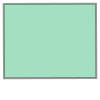

In [15]:
사업체매출grid['geometry'][1]

In [9]:
읍면동=[]
for i in range(len(사업체매출grid)):
    for j in range(len(법정경계)):
        if 법정경계['geometry'][j].contains(사업체매출grid['center_point'][i]) == True:
            읍면동.append(법정경계['EMD_KOR_NM'][j])

In [10]:
사업체매출grid['읍면동'] = 읍면동

In [22]:
사업체매출grid.head()

,gid,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,runoutmon,smbiz_yn,...,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn,geometry,center_point,lat,lng,읍면동
0,다바693579,12.0,0.0,1.0,0.0,0.0,2.0,9.0,0.0,9.0,...,Y,Y,Y,N,N,"MULTIPOLYGON (((127.15623 36.71863, 127.15622 ...",POINT (127.15678 36.71908),127.156784,36.719084,소정면
1,다바694581,7.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,7.0,...,N,N,Y,N,N,"MULTIPOLYGON (((127.15734 36.72044, 127.15733 ...",POINT (127.15790 36.72089),127.157896,36.720890,소정면
2,다바734535,9.0,0.0,0.0,1.0,0.0,2.0,6.0,0.0,9.0,...,N,Y,Y,N,N,"MULTIPOLYGON (((127.20229 36.67909, 127.20229 ...",POINT (127.20285 36.67954),127.202848,36.679542,전의면
3,다바735333,6.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,4.0,...,Y,N,N,N,N,"MULTIPOLYGON (((127.20411 36.49699, 127.20410 ...",POINT (127.20466 36.49744),127.204662,36.497443,장군면
4,다바735534,9.0,0.0,0.0,1.0,0.0,1.0,7.0,0.0,8.0,...,Y,N,N,N,N,"MULTIPOLYGON (((127.20341 36.67819, 127.20341 ...",POINT (127.20397 36.67864),127.203971,36.678643,전의면


In [28]:
인구거주격자.head()

,gid,201710_20대_거주인구수,201810_20대_거주인구수,201910_20대_거주인구수,202010_20대_거주인구수,201710_30대_거주인구수,201810_30대_거주인구수,201910_30대_거주인구수,202010_30대_거주인구수,201710_40대_거주인구수,...,201910_90대_거주인구수,202010_90대_거주인구수,201710_100세이상_거주인구수,201810_100세이상_거주인구수,201910_100세이상_거주인구수,202010_100세이상_거주인구수,geometry,center_point,lat,lng
0,다바667567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((127.12716 36.70773, 127.12716 ...",POINT (127.12772 36.70818),127.127723,36.708178
1,다바667568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((127.12716 36.70863, 127.12716 ...",POINT (127.12772 36.70908),127.127718,36.709080
2,다바668566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((127.12829 36.70683, 127.12828 ...",POINT (127.12885 36.70728),127.128847,36.707280
3,다바668567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((127.12828 36.70773, 127.12828 ...",POINT (127.12884 36.70818),127.128842,36.708182
4,다바668568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((127.12828 36.70863, 127.12828 ...",POINT (127.12884 36.70908),127.128838,36.709083


In [26]:
len(읍면동)

46484

In [30]:
인구거주격자.dropna(subset=['201710_20대_거주인구수','201810_20대_거주인구수','201910_20대_거주인구수',
       '202010_20대_거주인구수', '201710_30대_거주인구수', '201810_30대_거주인구수',
       '201910_30대_거주인구수', '202010_30대_거주인구수', '201710_40대_거주인구수',
       '201810_40대_거주인구수', '201910_40대_거주인구수', '202010_40대_거주인구수',
       '201710_50대_거주인구수', '201810_50대_거주인구수', '201910_50대_거주인구수',
       '202010_50대_거주인구수', '201710_60대_거주인구수', '201810_60대_거주인구수',
       '201910_60대_거주인구수', '202010_60대_거주인구수', '201710_70대_거주인구수',
       '201810_70대_거주인구수', '201910_70대_거주인구수', '202010_70대_거주인구수',
       '201710_80대_거주인구수', '201810_80대_거주인구수', '201910_80대_거주인구수',
       '202010_80대_거주인구수', '201710_90대_거주인구수', '201810_90대_거주인구수',
       '201910_90대_거주인구수', '202010_90대_거주인구수', '201710_100세이상_거주인구수',
       '201810_100세이상_거주인구수', '201910_100세이상_거주인구수', '202010_100세이상_거주인구수'],how='all',inplace=True)

In [34]:
인구거주격자.reset_index(inplace=True)
인구거주격자.drop('index',axis=1,inplace=True)
인구거주격자.head()

,gid,201710_20대_거주인구수,201810_20대_거주인구수,201910_20대_거주인구수,202010_20대_거주인구수,201710_30대_거주인구수,201810_30대_거주인구수,201910_30대_거주인구수,202010_30대_거주인구수,201710_40대_거주인구수,...,201910_90대_거주인구수,202010_90대_거주인구수,201710_100세이상_거주인구수,201810_100세이상_거주인구수,201910_100세이상_거주인구수,202010_100세이상_거주인구수,geometry,center_point,lat,lng
0,다바676569,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((127.13723 36.70956, 127.13723 ...",POINT (127.13779 36.71001),127.137791,36.710012
1,다바676570,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((127.13723 36.71046, 127.13722 ...",POINT (127.13779 36.71091),127.137786,36.710914
2,다바677570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((127.13835 36.71046, 127.13834 ...",POINT (127.13891 36.71092),127.138906,36.710917
3,다바677571,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((127.13834 36.71137, 127.13834 ...",POINT (127.13890 36.71182),127.138902,36.711819
4,다바678569,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((127.13947 36.70957, 127.13947 ...",POINT (127.14003 36.71002),127.140030,36.710019


In [58]:
# 개수 맞춰주기
gid=[]
for i in range(len(인구거주격자)):
    for j in range(len(법정경계)):
        if 법정경계['geometry'][j].contains(인구거주격자['center_point'][i]) == True:
            gid.append(인구거주격자['gid'][i])

In [59]:
set(인구거주격자['gid']) - set(gid)

{'다바707592',
 '다바723325',
 '다바783234',
 '다바842425',
 '다바853409',
 '다바871404',
 '다바877309',
 '다바889404'}

In [66]:
인구거주격자=인구거주격자[인구거주격자['gid'].isin(['다바707592','다바723325','다바783234','다바842425','다바853409',
 '다바871404','다바877309','다바889404']) ==False]
인구거주격자.reset_index(inplace=True)
인구거주격자.drop('index',axis=1,inplace=True)

In [67]:
읍면동=[]
for i in range(len(인구거주격자)):
    for j in range(len(법정경계)):
        if 법정경계['geometry'][j].contains(인구거주격자['center_point'][i]) == True:
            읍면동.append(법정경계['EMD_KOR_NM'][j])

In [68]:
인구거주격자['읍면동'] = 읍면동

In [27]:
인구거주격자.columns

Index(['gid', '201710_20대_거주인구수', '201810_20대_거주인구수', '201910_20대_거주인구수',
       '202010_20대_거주인구수', '201710_30대_거주인구수', '201810_30대_거주인구수',
       '201910_30대_거주인구수', '202010_30대_거주인구수', '201710_40대_거주인구수',
       '201810_40대_거주인구수', '201910_40대_거주인구수', '202010_40대_거주인구수',
       '201710_50대_거주인구수', '201810_50대_거주인구수', '201910_50대_거주인구수',
       '202010_50대_거주인구수', '201710_60대_거주인구수', '201810_60대_거주인구수',
       '201910_60대_거주인구수', '202010_60대_거주인구수', '201710_70대_거주인구수',
       '201810_70대_거주인구수', '201910_70대_거주인구수', '202010_70대_거주인구수',
       '201710_80대_거주인구수', '201810_80대_거주인구수', '201910_80대_거주인구수',
       '202010_80대_거주인구수', '201710_90대_거주인구수', '201810_90대_거주인구수',
       '201910_90대_거주인구수', '202010_90대_거주인구수', '201710_100세이상_거주인구수',
       '201810_100세이상_거주인구수', '201910_100세이상_거주인구수', '202010_100세이상_거주인구수',
       'geometry', 'center_point', 'lat', 'lng'],
      dtype='object')

In [73]:
인구거주격자_20대=인구거주격자[['201710_20대_거주인구수', '201810_20대_거주인구수', '201910_20대_거주인구수','202010_20대_거주인구수','읍면동']]
인구거주격자_30대=인구거주격자[['201710_30대_거주인구수', '201810_30대_거주인구수','201910_30대_거주인구수', '202010_30대_거주인구수','읍면동']]
인구거주격자_40대=인구거주격자[['201710_40대_거주인구수','201810_40대_거주인구수', '201910_40대_거주인구수', '202010_40대_거주인구수','읍면동']]
인구거주격자_50대=인구거주격자[['201710_50대_거주인구수', '201810_50대_거주인구수', '201910_50대_거주인구수','202010_50대_거주인구수','읍면동']]
인구거주격자_60대=인구거주격자[['201710_60대_거주인구수', '201810_60대_거주인구수','201910_60대_거주인구수', '202010_60대_거주인구수','읍면동']]
인구거주격자_70대=인구거주격자[['201710_70대_거주인구수','201810_70대_거주인구수', '201910_70대_거주인구수', '202010_70대_거주인구수','읍면동']]
인구거주격자_80대=인구거주격자[['201710_80대_거주인구수', '201810_80대_거주인구수', '201910_80대_거주인구수','202010_80대_거주인구수','읍면동']]
인구거주격자_90대=인구거주격자[['201710_90대_거주인구수', '201810_90대_거주인구수','201910_90대_거주인구수', '202010_90대_거주인구수','읍면동']]
인구거주격자_100세이상=인구거주격자[['201710_100세이상_거주인구수','201810_100세이상_거주인구수', '201910_100세이상_거주인구수', '202010_100세이상_거주인구수','읍면동']]

In [78]:
인구거주격자_20대.groupby('읍면동').sum()
인구거주격자_30대.groupby('읍면동').sum()
인구거주격자_40대.groupby('읍면동').sum()
인구거주격자_50대.groupby('읍면동').sum()
인구거주격자_60대.groupby('읍면동').sum()
인구거주격자_70대.groupby('읍면동').sum()
인구거주격자_80대.groupby('읍면동').sum()
인구거주격자_90대.groupby('읍면동').sum()
인구거주격자_100세이상.groupby('읍면동').sum()

<AxesSubplot:xlabel='읍면동'>

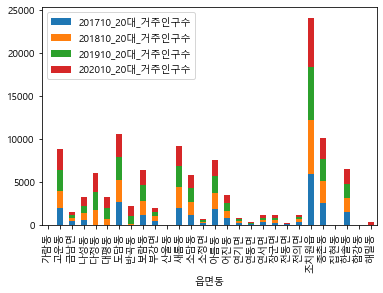

In [90]:
인구거주격자_20대.groupby('읍면동').sum().plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='읍면동'>

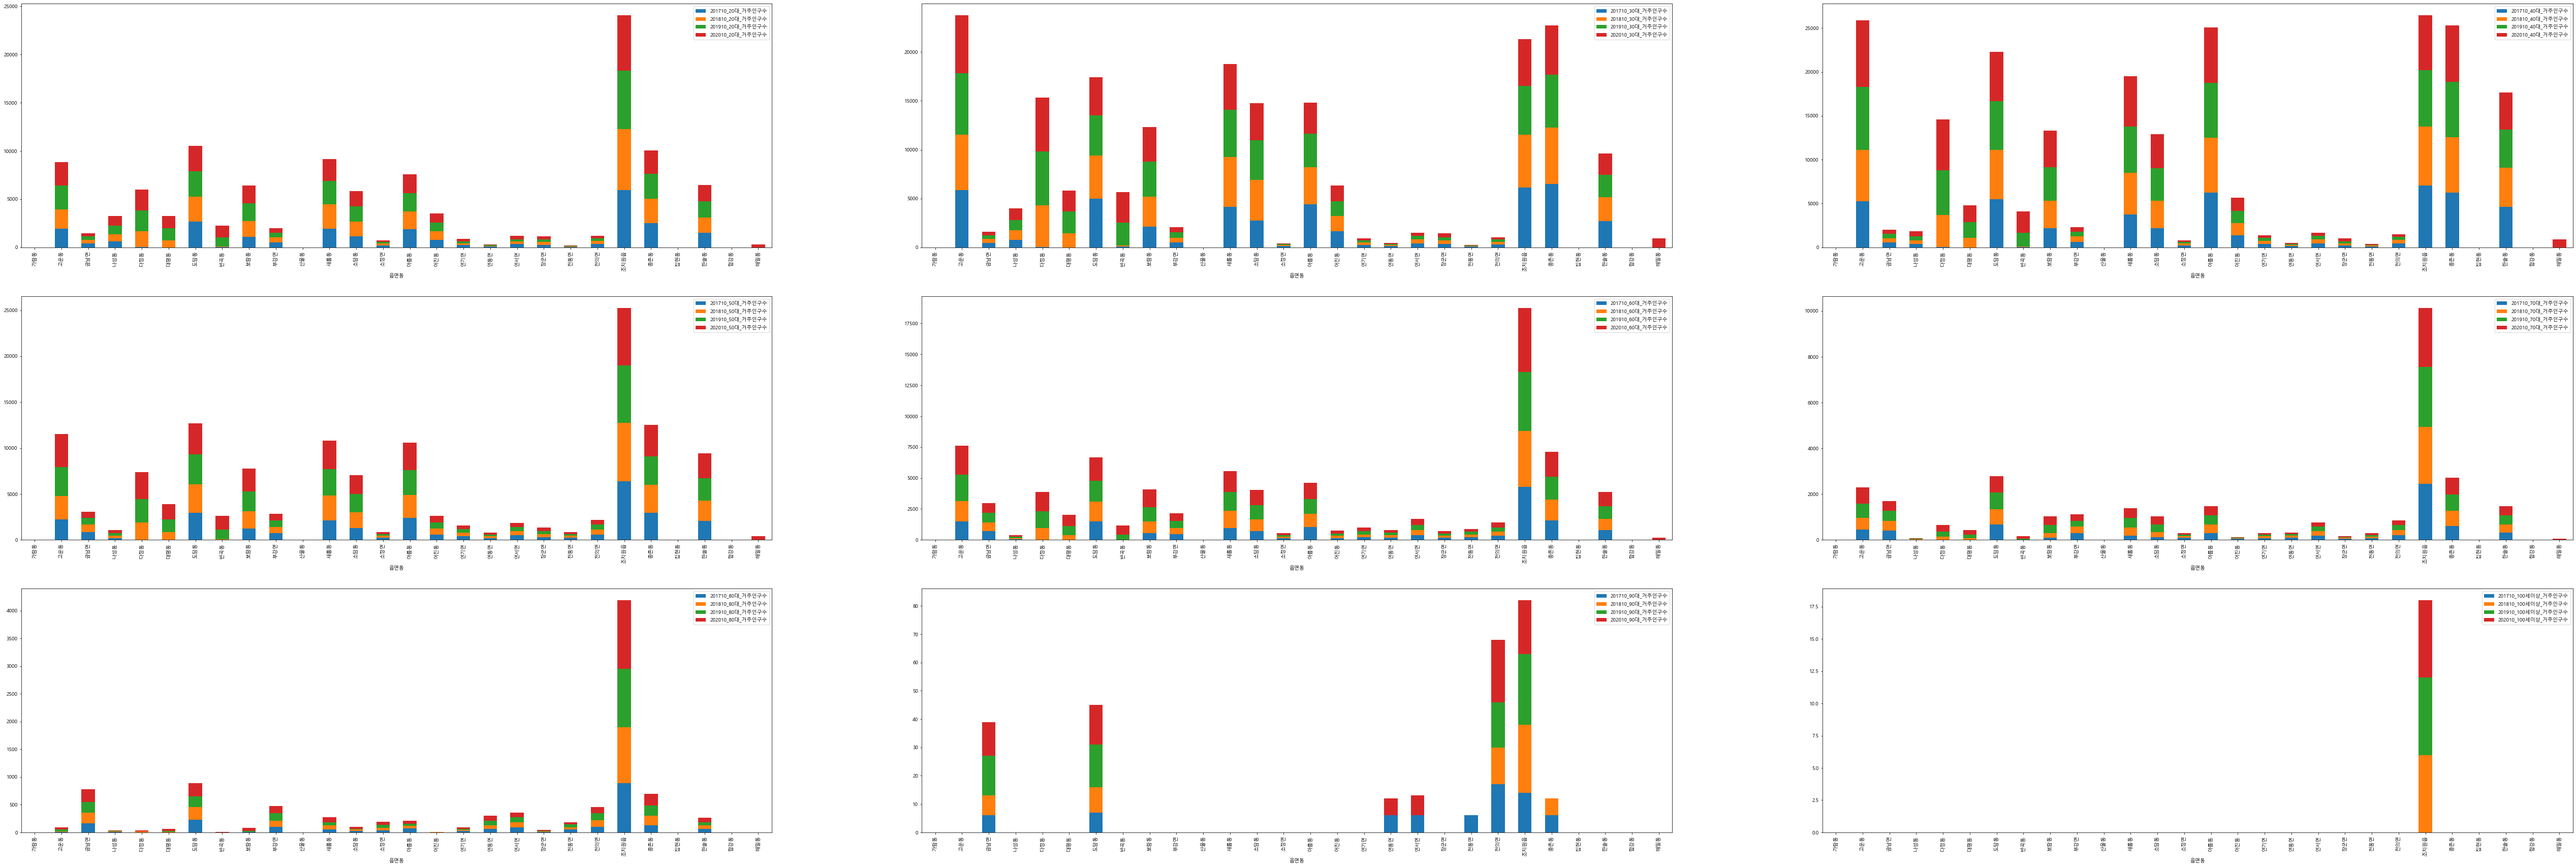

In [99]:
#연령별 년도 지역인구 시각화
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3)
figure.set_size_inches(90,30)


인구거주격자_20대.groupby('읍면동').sum().plot(kind='bar',stacked=True,ax=ax1)
인구거주격자_30대.groupby('읍면동').sum().plot(kind='bar',stacked=True,ax=ax2)
인구거주격자_40대.groupby('읍면동').sum().plot(kind='bar',stacked=True,ax=ax3)
인구거주격자_50대.groupby('읍면동').sum().plot(kind='bar',stacked=True,ax=ax4)
인구거주격자_60대.groupby('읍면동').sum().plot(kind='bar',stacked=True,ax=ax5)
인구거주격자_70대.groupby('읍면동').sum().plot(kind='bar',stacked=True,ax=ax6)
인구거주격자_80대.groupby('읍면동').sum().plot(kind='bar',stacked=True,ax=ax7)
인구거주격자_90대.groupby('읍면동').sum().plot(kind='bar',stacked=True,ax=ax8)
인구거주격자_100세이상.groupby('읍면동').sum().plot(kind='bar',stacked=True,ax=ax9)


In [100]:
# 사업체매출 지역별로
매출 = 사업체매출grid[['sales_est_amt_201703','sales_est_amt_201706','sales_est_amt_201709','sales_est_amt_201712',
                   'sales_est_amt_201803','sales_est_amt_201806','sales_est_amt_201809','sales_est_amt_201812',
                    'sales_est_amt_201903','sales_est_amt_201906','sales_est_amt_201909','sales_est_amt_201912',
                    'sales_est_amt_202003','sales_est_amt_202006','sales_est_amt_202009','읍면동']]

In [101]:
매출_17 = 매출[['sales_est_amt_201703','sales_est_amt_201706','sales_est_amt_201709','sales_est_amt_201712','읍면동']]
매출_18=매출[['sales_est_amt_201803','sales_est_amt_201806','sales_est_amt_201809','sales_est_amt_201812','읍면동']]
매출_19=매출[['sales_est_amt_201903','sales_est_amt_201906','sales_est_amt_201909','sales_est_amt_201912','읍면동']]
매출_20=매출[['sales_est_amt_202003','sales_est_amt_202006','sales_est_amt_202009','읍면동']]

<AxesSubplot:xlabel='읍면동'>

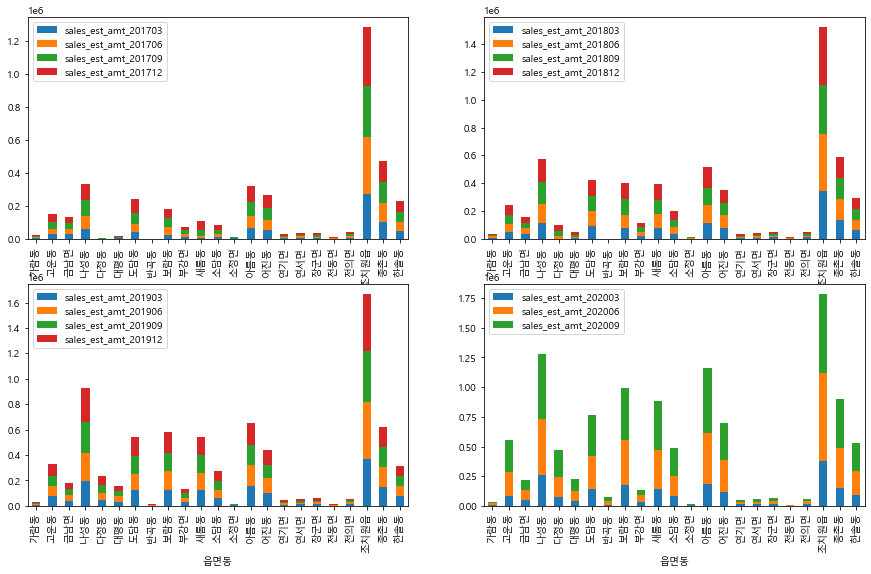

In [103]:
# 사업체매출 지역별로 시각화
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15,9)


매출_17.groupby('읍면동').sum().plot(kind='bar',stacked=True,ax=ax1)
매출_18.groupby('읍면동').sum().plot(kind='bar',stacked=True,ax=ax2)
매출_19.groupby('읍면동').sum().plot(kind='bar',stacked=True,ax=ax3)
매출_20.groupby('읍면동').sum().plot(kind='bar',stacked=True,ax=ax4)

In [ ]:
# 사업체 